In [2]:
!pip install ucimlrepo


from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 


  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each 

In [10]:
import pandas as pd

# Combine features and target into a single DataFrame
df_mushroom = pd.concat([X, y], axis=1)

# Save to CSV
df_mushroom.to_csv("mushroom_dataset.csv", index=False)

print("Dataset saved as mushroom_dataset.csv")


Dataset saved as mushroom_dataset.csv


1. Inspect Dataset Structure

In [3]:
# Check shape and sample rows
print(X.shape)
print(y.head())
print(X.head())


(8124, 22)
  poisonous
0         p
1         e
2         e
3         p
4         e
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-co

2. Encode Categorical Variables

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode each column in X
X_encoded = X.apply(LabelEncoder().fit_transform)

# Encode target (edible = e, poisonous = p)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y.values.ravel())  # y is a dataframe


3. Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42)


4. Train Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

5. Model Evaluation

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]


The model perfectly distinguishes between edible and poisonous mushrooms.

No false positives or false negatives were observed.

This is likely due to the highly separable nature of the categorical features in the dataset (especially odor).

6. Feature Importance

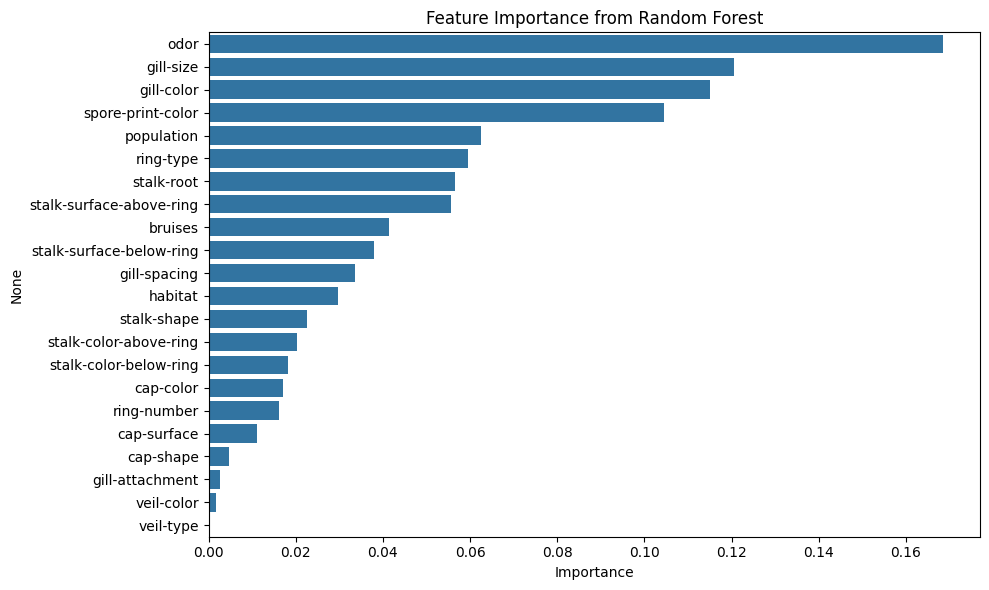

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


odor alone appears to nearly determine edibility — some odor values (like foul or pungent) directly indicate poisonous species.

gill-size and gill-color also show strong class separation.

Features such as veil-type, veil-color, and gill-attachment contributed almost nothing, indicating redundancy or low information.

7. Hyperparameter Tuning with Cross-Validation

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
Best CV Accuracy: 1.0


Even with a relatively small number of trees (n_estimators=50), the Random Forest achieved perfect performance.

The model generalizes well across all 5 folds in cross-validation.

Tree depth was not constrained (None), suggesting that the full depth helped the forest capture all class boundaries cleanly.

8. Conclusion
The Random Forest classifier achieved perfect performance on the Mushroom dataset, with the following takeaways:

It successfully models the edible vs. poisonous classification with 100% accuracy, indicating that the dataset has clear and strong decision boundaries.

The most important feature by far is odor, followed by gill-size and gill-color. These traits are biologically plausible indicators of toxicity.

Hyperparameter tuning confirmed that the model performs robustly across configurations, requiring no excessive complexity to achieve perfect prediction.

The Mushroom dataset is an ideal candidate for showcasing classification accuracy, feature importance, and model interpretability.